#financial_fraud_detection_dataset

In [22]:
# Importar librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
fraude_df = pd.read_csv('financial_fraud_detection_dataset.csv')

In [24]:
fraude_df

transaction_id                   timestamp sender_account  \
0              T100000  2023-08-22T09:22:43.516168      ACC877572   
1              T100001  2023-08-04T01:58:02.606711      ACC895667   
2              T100002  2023-05-12T11:39:33.742963      ACC733052   
3              T100003  2023-10-10T06:04:43.195112      ACC996865   
4              T100004  2023-09-24T08:09:02.700162      ACC584714   
...                ...                         ...            ...   
4999995       T5099995  2023-11-17T23:20:29.746144      ACC597319   
4999996       T5099996  2023-09-23T11:23:20.659686      ACC749625   
4999997       T5099997  2023-11-18T00:52:34.527092      ACC629492   
4999998       T5099998  2023-03-25T04:32:13.609837      ACC984720   
4999999       T5099999  2023-09-02T04:34:34.583803      ACC120255   

        receiver_account   amount transaction_type merchant_category  \
0              ACC388389   343.78       withdrawal         utilities   
1              ACC944962   419.65       withdrawal            online   
2              ACC377370  2773.86          deposit             other   
3              ACC344098  1666.22          deposit            online   
4              ACC497887    24.43         transfer         utilities   
...                  ...      ...              ...               ...   
4999995        ACC749300    10.87       withdrawal            retail   
4999996        ACC709783   181.40          payment           grocery   
4999997        ACC680736    12.54          payment         utilities   
4999998        ACC296935   376.29          deposit        restaurant   
4999999        ACC440137     7.27         transfer           grocery   

         location device_used  is_fraud fraud_type  \
0           Tokyo      mobile     False        NaN   
1         Toronto         atm     False        NaN   
2          London         pos     False        NaN   
3          Sydney         pos     False        NaN   
4         Toronto      mobile     False        NaN   
...           ...         ...       ...        ...   
4999995   Toronto         atm     False        NaN   
4999996    Sydney         atm     False        NaN   
4999997  New York      mobile     False        NaN   
4999998     Dubai         pos     False        NaN   
4999999    Sydney         atm     False        NaN   

         time_since_last_transaction  spending_deviation_score  \
0                                NaN                     -0.21   
1                                NaN                     -0.14   
2                                NaN                     -1.78   
3                                NaN                     -0.60   
4                                NaN                      0.79   
...                              ...                       ...   
4999995                  1416.524233                     -0.14   
4999996                   999.089702                     -1.79   
4999997                  3871.584025                     -0.30   
4999998                 -4096.765453                     -1.43   
4999999                  5257.349021                      0.08   

         velocity_score  geo_anomaly_score payment_channel       ip_address  \
0                     3               0.22            card   13.101.214.112   
1                     7               0.96             ACH    172.52.47.194   
2                    20               0.89            card     185.98.35.23   
3                     6               0.37   wire_transfer    107.136.36.87   
4                    13               0.27             ACH  108.161.108.255   
...                 ...                ...             ...              ...   
4999995              17               0.18             UPI    243.92.38.163   
4999996               4               0.58   wire_transfer    28.252.18.249   
4999997               6               0.99            card  111.199.174.121   
4999998               5               0.32   wire_transfer   221.110.215.14   
499

In [25]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

###**Traducci√≥n del encabezado de las columnas**

In [26]:
#renombrando columnas
fraude_df.rename(columns={
'transaction_id': 'ID de transacci√≥n',
'timestamp':  'fecha y hora',
'sender_account':	'cuenta emisora',
'receiver_account':'cuenta receptora',
'amount':'monto',
'transaction_type':'tipo de transacci√≥n',
'merchant_category':	'categor√≠a de comerciante',
'location':	'ubicaci√≥n',
'device_used':	'dispositivo utilizado',
'is_fraud':	'es fraude (s√≠/no)',
'fraud_type':	'tipo de fraude',
'time_since_last_transaction':	'tiempo desde la √∫ltima transacci√≥n',
'spending_deviation_score':	'puntuaci√≥n de desviaci√≥n de gasto',
'velocity_score':	'puntuaci√≥n de velocidad (de transacciones)',
'geo_anomaly_score':	'puntuaci√≥n de anomal√≠a geogr√°fica',
'payment_channel':	'canal de pago',
'ip_address':	'direcci√≥n IP',
'device_hash':	'huella digital del dispositivo'
}, inplace=True)

In [27]:
# Configuraci√≥n visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [28]:
# --- Parte 1: Exploraci√≥n b√°sica ---
print("\n--- Resumen de columnas ---")
print(fraude_df.info())


--- Resumen de columnas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   ID de transacci√≥n                           object 
 1   fecha y hora                                object 
 2   cuenta emisora                              object 
 3   cuenta receptora                            object 
 4   monto                                       float64
 5   tipo de transacci√≥n                         object 
 6   categor√≠a de comerciante                    object 
 7   ubicaci√≥n                                   object 
 8   dispositivo utilizado                       object 
 9   es fraude (s√≠/no)                           bool   
 10  tipo de fraude                              object 
 11  tiempo desde la √∫ltima transacci√≥n          float64
 12  puntuaci√≥n de desviaci√≥n de gasto           fl

In [29]:
print("\n--- Primeras filas ---")
print(fraude_df.head())


--- Primeras filas ---
  ID de transacci√≥n                fecha y hora cuenta emisora  \
0           T100000  2023-08-22T09:22:43.516168      ACC877572   
1           T100001  2023-08-04T01:58:02.606711      ACC895667   
2           T100002  2023-05-12T11:39:33.742963      ACC733052   
3           T100003  2023-10-10T06:04:43.195112      ACC996865   
4           T100004  2023-09-24T08:09:02.700162      ACC584714   

  cuenta receptora    monto tipo de transacci√≥n categor√≠a de comerciante  \
0        ACC388389   343.78          withdrawal                utilities   
1        ACC944962   419.65          withdrawal                   online   
2        ACC377370  2773.86             deposit                    other   
3        ACC344098  1666.22             deposit                   online   
4        ACC497887    24.43            transfer                utilities   

  ubicaci√≥n dispositivo utilizado  es fraude (s√≠/no) tipo de fraude  \
0     Tokyo                mobile             

In [30]:
print("\n--- Transacciones totales y fraudulentas ---")
print(fraude_df["es fraude (s√≠/no)"].value_counts())


--- Transacciones totales y fraudulentas ---
es fraude (s√≠/no)
False    4820447
True      179553
Name: count, dtype: int64


In [31]:
print("\n--- Valores nulos ---")
print(fraude_df.isnull().sum())


--- Valores nulos ---
ID de transacci√≥n                                   0
fecha y hora                                        0
cuenta emisora                                      0
cuenta receptora                                    0
monto                                               0
tipo de transacci√≥n                                 0
categor√≠a de comerciante                            0
ubicaci√≥n                                           0
dispositivo utilizado                               0
es fraude (s√≠/no)                                   0
tipo de fraude                                4820447
tiempo desde la √∫ltima transacci√≥n             896513
puntuaci√≥n de desviaci√≥n de gasto                   0
puntuaci√≥n de velocidad (de transacciones)          0
puntuaci√≥n de anomal√≠a geogr√°fica                   0
canal de pago                                       0
direcci√≥n IP                                        0
huella digital del dispositivo               

In [32]:
# --- Parte 2: Estad√≠sticas con NumPy ---
amount_mean = np.mean(fraude_df["monto"])
amount_std = np.std(fraude_df["monto"])
print(f"\nMonto promedio: {amount_mean:.2f}, Desviaci√≥n est√°ndar: {amount_std:.2f}")


Monto promedio: 358.93, Desviaci√≥n est√°ndar: 469.93


In [33]:
fraud_amount_mean = fraude_df[fraude_df["es fraude (s√≠/no)"] == True]["monto"].mean()
nonfraud_amount_mean = fraude_df[fraude_df["es fraude (s√≠/no)"] == False]["monto"].mean()
print(f"Monto promedio FRAUDE: {fraud_amount_mean:.2f}, NO FRAUDE: {nonfraud_amount_mean:.2f}")

Monto promedio FRAUDE: 358.53, NO FRAUDE: 358.95


¬øQu√© significa esto?

   amount_mean: Es el monto promedio de todas las transacciones en el dataset.

        Por ejemplo: si ves Monto promedio: 456.72, significa que en promedio, las transacciones tienen un valor de 456.72 unidades monetarias.

   amount_std: Es la desviaci√≥n est√°ndar del monto, que indica cu√°nto var√≠an los montos respecto al promedio.

        Si la desviaci√≥n est√°ndar es alta (por ejemplo, 1200.56), quiere decir que hay mucha diferencia entre los montos: algunas transacciones pueden ser muy peque√±as y otras muy grandes.

  ¬øC√≥mo interpretarlo?

   Monto promedio bajo + desviaci√≥n est√°ndar alta ‚Üí Hay muchas transacciones peque√±as y unas pocas muy grandes (posiblemente an√≥malas).

   Monto promedio alto + desviaci√≥n est√°ndar baja ‚Üí Las transacciones son consistentemente grandes y estables.

   Puedes comparar estos valores con los de transacciones fraudulentas vs no fraudulentas para detectar patrones de riesgo.



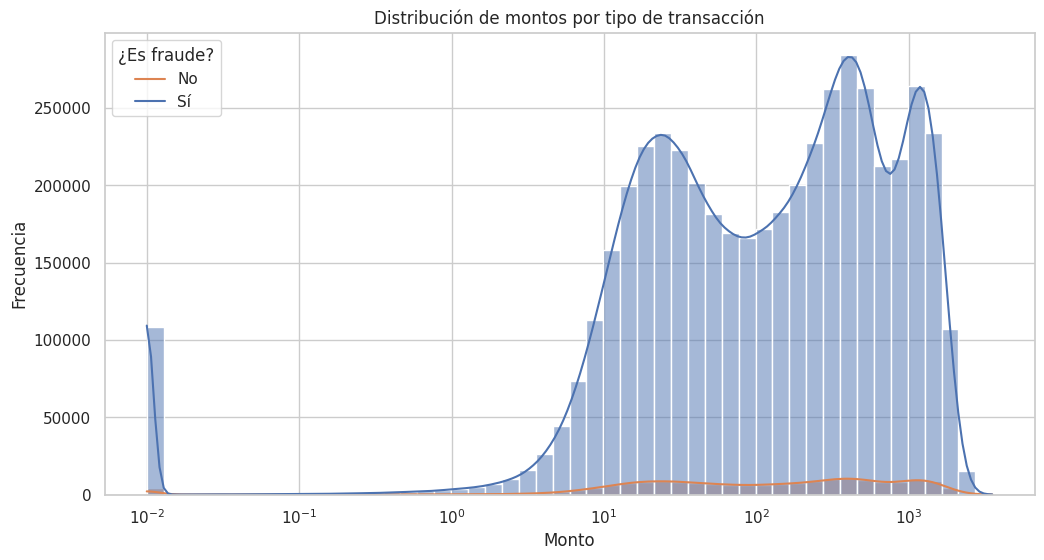

In [34]:
# --- Parte 3: Visualizaciones ---
# Histograma de montos por tipo de transacci√≥n
plt.figure()
sns.histplot(data=fraude_df, x="monto", hue="es fraude (s√≠/no)", bins=50, log_scale=(True, False), kde=True)
plt.title("Distribuci√≥n de montos por tipo de transacci√≥n")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.legend(title="¬øEs fraude?", labels=["No", "S√≠"])
plt.show()

  ¬øQu√© muestra el gr√°fico?

   Eje X: Monto de la transacci√≥n (amount)

   Eje Y: Frecuencia (cantidad de transacciones que tienen ese rango de monto)

   Color:

        Un color representa las transacciones no fraudulentas

        Otro color representa las fraudulentas

     hue="is_fraud": Separa los datos por si son fraudes o no.

     log_scale=(True, False): Escala logar√≠tmica en el eje X para manejar la gran variaci√≥n de montos (√∫til si hay muchos valores peque√±os y pocos muy grandes).

     kde=True: A√±ade una l√≠nea de densidad (curva suavizada) encima del histograma.

  ¬øC√≥mo interpretarlo?

   Si los fraudes se concentran en un rango espec√≠fico de montos, lo ver√°s como un pico del color de "fraude" en una zona espec√≠fica del eje X.

   Si las transacciones leg√≠timas est√°n m√°s distribuidas y los fraudes m√°s concentrados, puede ser una se√±al √∫til para detectar patrones.

   Si la curva KDE de fraudes tiene una forma distinta a la de no fraudes, puedes usarlo como insight para un modelo predictivo.

  Ejemplo de interpretaci√≥n:

   Si ves que los fraudes ocurren con mayor frecuencia en montos entre $1,000 y $5,000, mientras que las transacciones leg√≠timas son mayormente peque√±as, entonces ese rango se vuelve sospechoso.



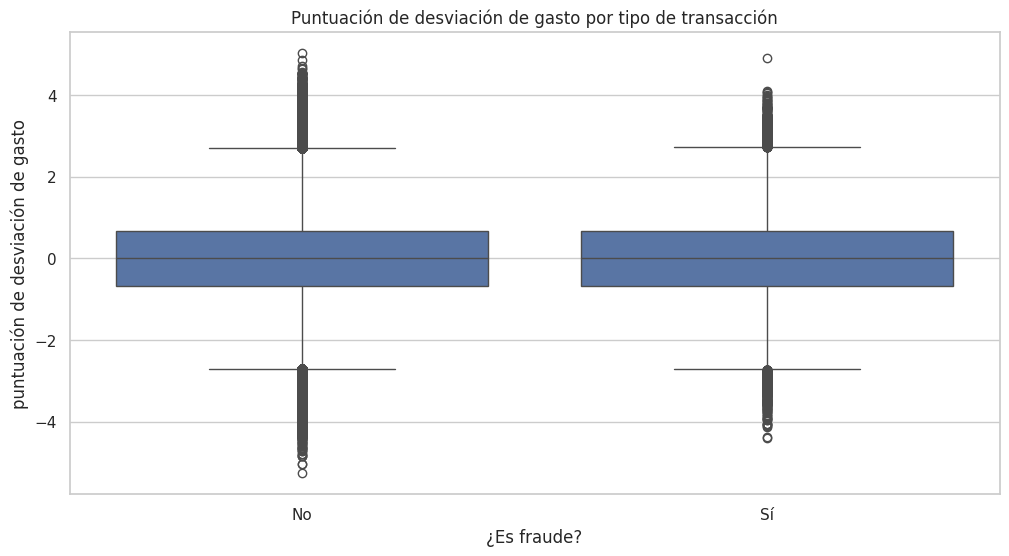

In [35]:
# Boxplot de spending_deviation_score
plt.figure()
sns.boxplot(data=fraude_df, x="es fraude (s√≠/no)", y="puntuaci√≥n de desviaci√≥n de gasto")
plt.title("Puntuaci√≥n de desviaci√≥n de gasto por tipo de transacci√≥n")
plt.xlabel("¬øEs fraude?")
plt.ylabel("puntuaci√≥n de desviaci√≥n de gasto")
plt.xticks([0, 1], ["No", "S√≠"])
plt.show()


Es un diagrama de caja (boxplot) que compara el spending_deviation_score entre transacciones fraudulentas y no fraudulentas.
  ¬øQu√© muestra este boxplot?

Cada caja resume la distribuci√≥n del spending_deviation_score (una medida de cu√°nto se desv√≠a el gasto de lo habitual) seg√∫n si la transacci√≥n es fraude (S√≠) o no lo es (No).

   L√≠nea central (dentro de la caja): Mediana del score.

   Bordes de la caja: Primer y tercer cuartil (Q1 y Q3).

   Bigotes (whiskers): Extienden hasta valores razonables (dentro de 1.5 √ó rango intercuart√≠lico).

   Puntos fuera de los bigotes: Outliers o valores at√≠picos.

 ¬øC√≥mo interpretarlo?

   Si las cajas de fraudes y no fraudes son visiblemente diferentes en altura, posici√≥n o rango, el score spending_deviation_score es √∫til para distinguir entre ambos casos.

     Por ejemplo:

        Si las transacciones fraudulentas tienen una mediana m√°s alta o m√°s baja que las no fraudulentas,

        O si tienen m√°s outliers extremos,

        Entonces esta variable puede ser importante en un modelo de detecci√≥n de fraudes.



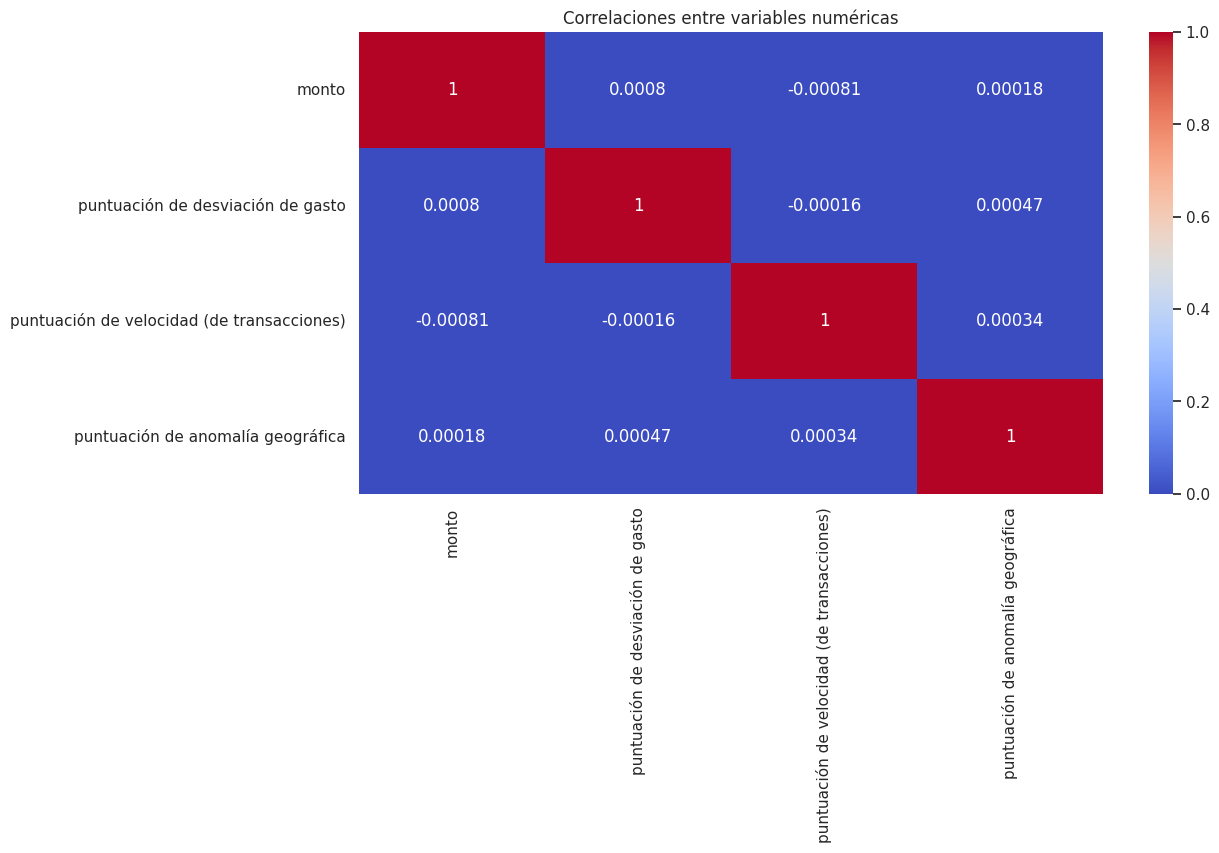

In [36]:
# Heatmap de correlaciones
plt.figure()
cols = ["monto", "puntuaci√≥n de desviaci√≥n de gasto", "puntuaci√≥n de velocidad (de transacciones)", "puntuaci√≥n de anomal√≠a geogr√°fica"]
correlation = fraude_df[cols].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlaciones entre variables num√©ricas")
plt.show()

üìä Significado del gr√°fico:

Este mapa de calor (heatmap) muestra c√≥mo est√°n relacionadas las variables num√©ricas seleccionadas entre s√≠, mediante la correlaci√≥n de Pearson, que mide la fuerza y direcci√≥n de una relaci√≥n lineal.
üî¢ Valores posibles de correlaci√≥n:

  +1 ‚Üí correlaci√≥n positiva perfecta (cuando una sube, la otra tambi√©n).

  0 ‚Üí sin relaci√≥n lineal.

   ‚Äì1 ‚Üí correlaci√≥n negativa perfecta (cuando una sube, la otra baja).

   ¬øC√≥mo interpretar este heatmap?

     Cada celda muestra el valor de correlaci√≥n entre dos variables.

     El color indica la intensidad:

        üî¥ rojo = correlaci√≥n positiva fuerte

        üîµ azul = correlaci√≥n negativa fuerte

        ‚ö™ blanco = d√©bil o nula

     annot=True permite ver los n√∫meros exactos.

 Ejemplo pr√°ctico (sup√≥n que ves esto):
	 amount	spending_deviation_score	velocity_score	geo_anomaly_score
 amount	1.00	0.25	0.05	0.02
spending_deviation	0.25	1.00	0.65	-0.10
velocity_score	0.05	0.65	1.00	-0.30
geo_anomaly_score	0.02	-0.10	-0.30	1.00
Interpretaci√≥n:

     spending_deviation_score y velocity_score est√°n moderadamente correlacionados (0.65): cuando alguien se desv√≠a mucho del gasto normal, tambi√©n suele hacer transacciones m√°s r√°pidas o inusuales.

     geo_anomaly_score tiene correlaci√≥n negativa d√©bil con los dem√°s: su comportamiento es algo independiente.

     amount no est√° muy correlacionado con ninguna otra variable ‚áí el monto por s√≠ solo no predice bien estos scores.

  ¬øPor qu√© es √∫til?

     Te ayuda a detectar relaciones entre variables que podr√≠an causar multicolinealidad si usas modelos como regresi√≥n.

     Puedes descubrir nuevas combinaciones √∫tiles para detecci√≥n de fraudes.



In [37]:
# --- Parte 4: An√°lisis por categor√≠as ---
# Categor√≠a con m√°s fraudes
print("\n--- Fraudes por categor√≠a de comercio ---")
print(fraude_df[fraude_df["es fraude (s√≠/no)"] == True]["categor√≠a de comerciante"].value_counts().head())



--- Fraudes por categor√≠a de comercio ---
categor√≠a de comerciante
entertainment    22573
other            22556
grocery          22516
travel           22503
retail           22453
Name: count, dtype: int64


 ¬øQu√© hace este bloque de c√≥digo?

Este c√≥digo analiza el campo merchant_category (categor√≠a del comercio) √∫nicamente para las transacciones fraudulentas (is_fraud == True) y muestra las categor√≠as donde ocurrieron m√°s fraudes.
  ¬øQu√© significa?

   Te dice en qu√© tipo de comercios (por ejemplo, online, grocery, utilities, etc.) ocurre con m√°s frecuencia el fraude.

   El m√©todo .value_counts().head() ordena de mayor a menor y muestra las 5 categor√≠as principales.

  Ejemplo de salida posible:

--- Fraudes por categor√≠a de comercio ---
online       5340
grocery      4890
utilities    3125
retail       2784
restaurant   2541
Name: merchant_category, dtype: int64

  Esto nos dice que:

     La mayor√≠a de fraudes ocurrieron en la categor√≠a online, seguida por grocery (tiendas de abarrotes), etc.

     Esto puede indicar que ciertos tipos de comercio son m√°s vulnerables al fraude (como pagos en l√≠nea).

  ¬øPor qu√© es √∫til?

     Puedes enfocar la vigilancia o medidas antifraude en esas categor√≠as.

     Puede alimentar un modelo de detecci√≥n de fraudes (como variable categ√≥rica con peso).

     Sirve para presentar hallazgos a √°reas de seguridad, compliance o negocio.



/tmp/ipython-input-38-2085216937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_categories.values, y=fraud_categories.index, palette="Reds_r")


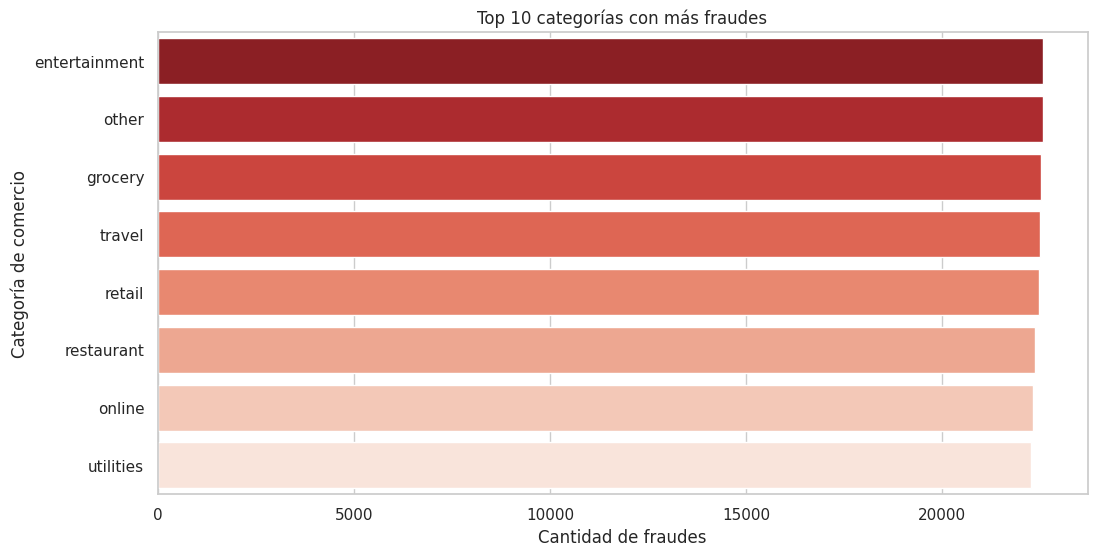

In [38]:
# Gr√°fico de barras: categor√≠as con m√°s fraudes
plt.figure()
fraud_categories = fraude_df[fraude_df["es fraude (s√≠/no)"] == True]["categor√≠a de comerciante"].value_counts().head(10)
sns.barplot(x=fraud_categories.values, y=fraud_categories.index, palette="Reds_r")
plt.title("Top 10 categor√≠as con m√°s fraudes")
plt.xlabel("Cantidad de fraudes")
plt.ylabel("Categor√≠a de comercio")
plt.show()


 Qu√© aporta este gr√°fico?

     Visualiza de forma clara en qu√© tipos de comercios ocurren m√°s fraudes.

     Es √∫til para presentaciones, an√°lisis de riesgo o priorizaci√≥n de medidas antifraude.



In [39]:
# Dispositivo m√°s com√∫n en fraudes
print("\n--- Fraudes por dispositivo usado ---")
print(fraude_df[fraude_df["es fraude (s√≠/no)"] == True]["dispositivo utilizado"].value_counts())



--- Fraudes por dispositivo usado ---
dispositivo utilizado
atm       45217
pos       44852
web       44807
mobile    44677
Name: count, dtype: int64


In [40]:
# Ubicaciones con m√°s fraudes
print("\n--- Fraudes por ubicaci√≥n ---")
print(fraude_df[fraude_df["es fraude (s√≠/no)"] == True]["ubicaci√≥n"].value_counts().head())


--- Fraudes por ubicaci√≥n ---
ubicaci√≥n
Toronto      22501
London       22478
Singapore    22461
New York     22460
Sydney       22458
Name: count, dtype: int64


<Axes: xlabel='puntuaci√≥n de velocidad (de transacciones)', ylabel='puntuaci√≥n de desviaci√≥n de gasto'>

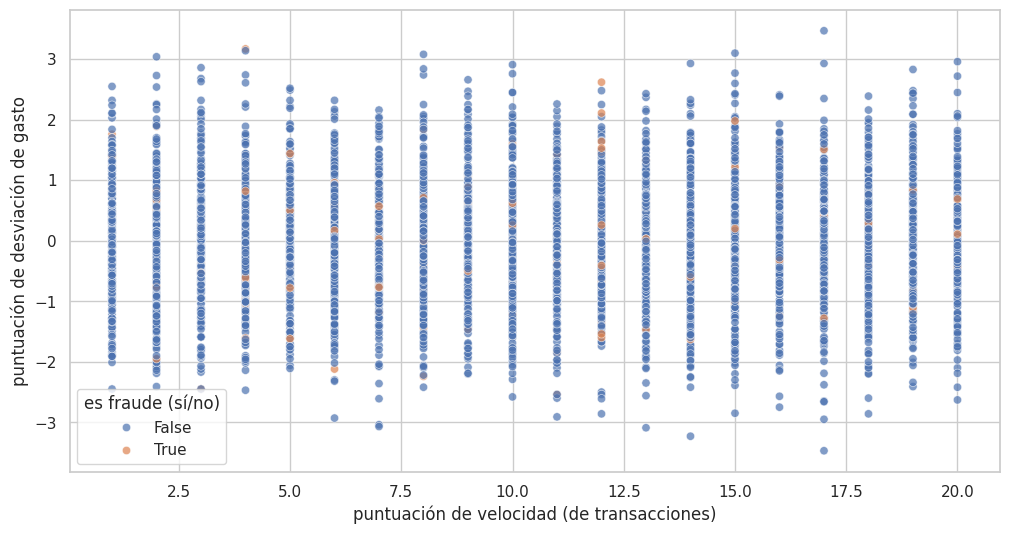

In [41]:
# --- Extra: Scatter plot con color por fraude ---
plt.figure()
sns.scatterplot(
    data=fraude_df.sample(5000),
    x="puntuaci√≥n de velocidad (de transacciones)",
    y="puntuaci√≥n de desviaci√≥n de gasto",
    hue="es fraude (s√≠/no)",
    alpha=0.7)

üìä ¬øQu√© tipo de gr√°fico es?

Es un scatter plot (diagrama de dispersi√≥n), donde:

     Cada punto representa una transacci√≥n.

     Se grafican 5000 muestras aleatorias para no saturar el gr√°fico.

     El color del punto indica si la transacci√≥n fue fraudulenta (is_fraud=True) o no (is_fraud=False).

     El eje X representa el velocity_score (qu√© tan r√°pido o frecuente es el comportamiento).

     El eje Y muestra el spending_deviation_score (cu√°nto se desv√≠a el gasto de lo habitual).

   ¬øC√≥mo interpretar el gr√°fico?

     Los puntos se agrupan en zonas del gr√°fico seg√∫n los patrones de comportamiento.

     Si ves que los fraudes (probablemente en rojo o naranja) tienden a concentrarse en una regi√≥n espec√≠fica del gr√°fico, por ejemplo en valores altos de velocity_score y spending_deviation_score, eso sugiere que las transacciones r√°pidas y con gasto inusual son m√°s propensas al fraude.

     Si no hay una separaci√≥n clara, eso indica que estos dos scores por s√≠ solos no bastan para diferenciar fraudes ‚Äî pero podr√≠an ser √∫tiles como parte de un modelo m√°s complejo.

   ¬øPara qu√© sirve este gr√°fico?

     Ayuda a visualizar relaciones no lineales entre variables num√©ricas.

     Es √∫til para detectar patrones de fraude visualmente.

     Tambi√©n puede ayudarte a decidir si incluir estas variables en un modelo de clasificaci√≥n.



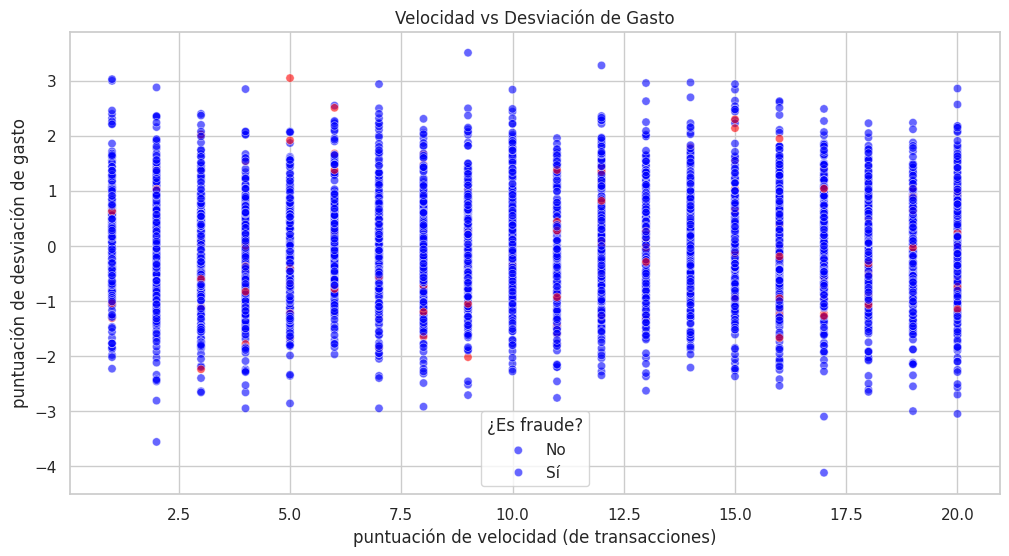

In [42]:
# Scatter plot con limpieza previa
df_clean = fraude_df[["puntuaci√≥n de velocidad (de transacciones)", "puntuaci√≥n de desviaci√≥n de gasto", "es fraude (s√≠/no)"]].dropna()
plt.figure()
sns.scatterplot(
    data=df_clean.sample(5000),
    x="puntuaci√≥n de velocidad (de transacciones)",
    y="puntuaci√≥n de desviaci√≥n de gasto",
    hue="es fraude (s√≠/no)",
    alpha=0.6,
    palette={False: "blue", True: "red"}
)
plt.title("Velocidad vs Desviaci√≥n de Gasto")
plt.xlabel("puntuaci√≥n de velocidad (de transacciones)")
plt.ylabel("puntuaci√≥n de desviaci√≥n de gasto")
plt.legend(title="¬øEs fraude?", labels=["No", "S√≠"])
plt.show()


Este gr√°fico de dispersi√≥n (scatter plot) que aparece en la secci√≥n Extra: Scatter plot con color por fraude tiene como objetivo visualizar la relaci√≥n entre dos variables num√©ricas y su relaci√≥n con el fraude:

  Interpretaci√≥n:

     Eje X (velocity_score): mide la rapidez o frecuencia de las transacciones en un per√≠odo de tiempo. Valores m√°s altos indican actividad inusualmente r√°pida.

     Eje Y (spending_deviation_score): indica cu√°nto se desv√≠a el gasto actual respecto al comportamiento esperado. Valores altos (positivos o negativos) pueden ser se√±al de comportamiento at√≠pico.

     Color del punto (hue="is_fraud"):

         üîµ Azul: transacciones no fraudulentas

         üî¥ Rojo: transacciones fraudulentas

  ¬øQu√© puedes descubrir?

     Si los puntos rojos (fraudes) se agrupan en una regi√≥n espec√≠fica del gr√°fico (por ejemplo, alto velocity_score y alto spending_deviation_score), eso indica que ciertos patrones de comportamiento est√°n asociados al fraude.

     Si los colores est√°n mezclados sin un patr√≥n claro, significa que estas dos variables por s√≠ solas no son suficientes para identificar fraudes, pero a√∫n pueden ser √∫tiles dentro de un modelo de detecci√≥n m√°s completo.

  ¬øPor qu√© es √∫til este gr√°fico?

     Es una herramienta de an√°lisis exploratorio para identificar patrones sospechosos.

     Puede ayudarte a decidir qu√© variables incluir en un modelo de machine learning.

     Sirve como apoyo visual para entender el comportamiento de usuarios normales vs. fraudulentos.

